# Load modules

In [1]:
# This modles that we will use for this notebook.

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import torch
from iterativennsimple.utils.load_data import load_data

# The Data



Remember, before you can look at the data you need to generate it. The data is generated by the following code:

```bash
cd scripts
python generate_data.py
```

We want a simple yet non-trivial problem for demonstrating the methods, so we do a manifold problem.  I.e., there is a space that contains a manifold of some given form and dimension, and each training example is a point on the manifold.  The idea is to train the model to be a dynamical system where the manifold is an attractor.

For example, we can use a simple manifold, such as a circle in 2D.  We can use a circle because it is easy to visualize and easy to generate.  
However, other manifolds are also possible.

Another example would be a 2D Swiss roll, which is a classic 2D manifold in 3D space.  This is a bit more complicated to generate, but it is still easy to visualize.

Other examples would be MNIST1D and MNIST, where the manifold is the set of all possible images of a given digit.  This is a much more complicated manifold.  Note, we can, and should, condition the problem where each image is labeled with its true digit.

Finally we have real world examples, such EM localization, trajectory classification, and chemical sensor data.  These are all manifolds in some high dimensional space.    

The data consists of pairs of vectors, where the first vector is a starting vector and the second vector is the target vector.  The input vector is a point not on the manifold, and the target vector some point on the manifold we want the input vector to converge to.  The idea is to train the model to be a dynamical system where the manifold is an attractor where the starting vector is attracted to the target vector.

# Regression line

In [2]:
data = load_data('regression_line')
x_on = data['target']['x0']
y_on = data['target']['x1']
x_off = data['start']['x0']
y_off = data['start']['x1']
num_points = len(x_on)

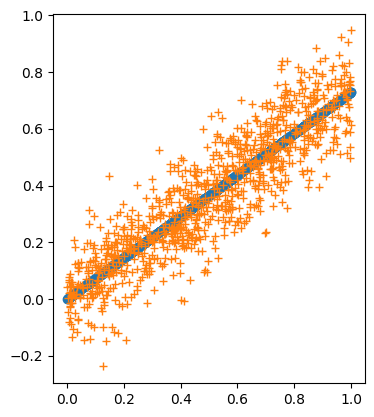

In [3]:
_, ax = plt.subplots()
ax.plot(x_on, y_on, 'o')
ax.plot(x_off, y_off, '+')
ax.set_aspect('equal')

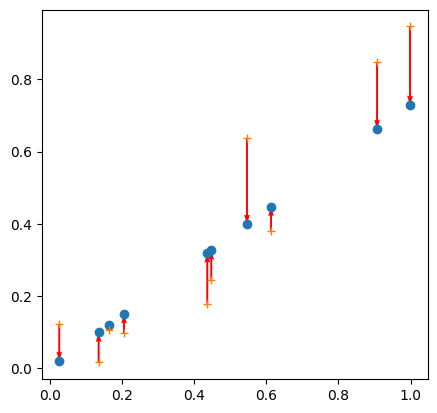

In [4]:

idx = np.random.choice(range(num_points), 10)
_, ax = plt.subplots()
ax.plot(x_on[idx], y_on[idx], 'o')
ax.plot(x_off[idx], y_off[idx], '+')
ax.quiver(x_off[idx], y_off[idx], x_on[idx]-x_off[idx], y_on[idx]-y_off[idx],
          scale=1, scale_units='xy', angles='xy', color='r', width=0.005)
ax.set_aspect('equal')

# PCA line

In [5]:
data = load_data('pca_line')
x_on = data['target']['x0']
y_on = data['target']['x1']
x_off = data['start']['x0']
y_off = data['start']['x1']
num_points = len(x_on)

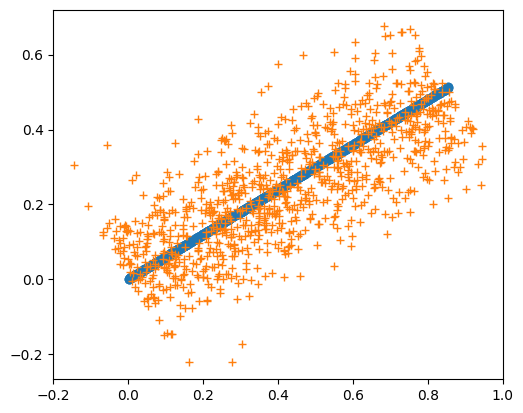

In [6]:
_, ax = plt.subplots()
ax.plot(x_on, y_on, 'o')
ax.plot(x_off, y_off, '+')
ax.set_aspect('equal')

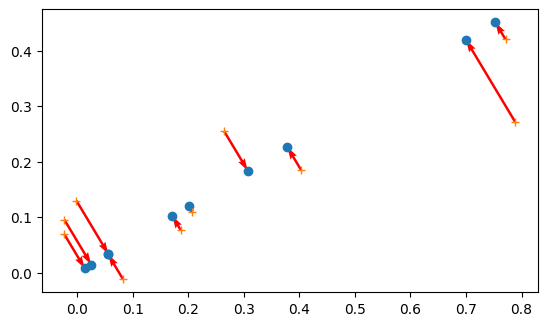

In [7]:

idx = np.random.choice(range(num_points), 10)
_, ax = plt.subplots()
ax.plot(x_on[idx], y_on[idx], 'o')
ax.plot(x_off[idx], y_off[idx], '+')
ax.quiver(x_off[idx], y_off[idx], x_on[idx]-x_off[idx], y_on[idx]-y_off[idx],
          scale=1, scale_units='xy', angles='xy', color='r', width=0.005)
ax.set_aspect('equal')

# Circle

In [8]:
data = load_data('circle')
x_on = data['target']['x0']
y_on = data['target']['x1']
x_off = data['start']['x0']
y_off = data['start']['x1']
num_points = len(x_on)

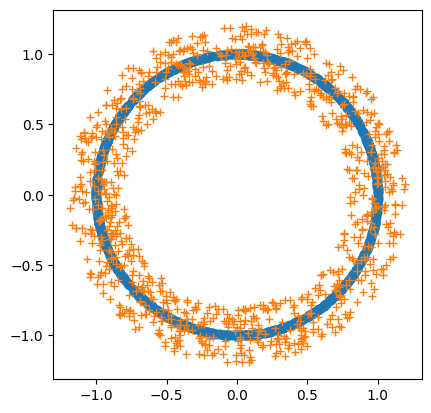

In [9]:
_, ax = plt.subplots()
ax.plot(x_on, y_on, 'o')
ax.plot(x_off, y_off, '+')
ax.set_aspect('equal')

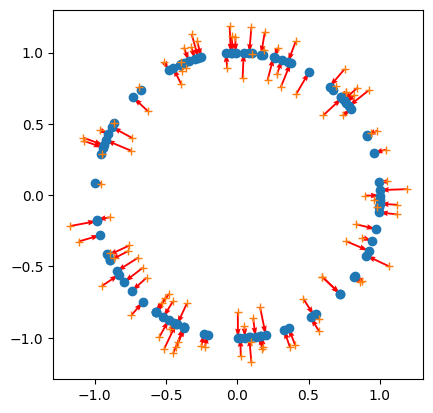

In [10]:
idx = np.random.choice(range(num_points), 100)
_, ax = plt.subplots()
ax.plot(x_on[idx], y_on[idx], 'o')
ax.plot(x_off[idx], y_off[idx], '+')
ax.quiver(x_off[idx], y_off[idx], x_on[idx]-x_off[idx], y_on[idx]-y_off[idx],
          scale=1, scale_units='xy', angles='xy', color='r', width=0.005)
ax.set_aspect('equal')

# Regression circle

In [11]:
data = load_data('regression_circle')
x_on = data['target']['x0']
y_on = data['target']['x1']
x_off = data['start']['x0']
y_off = data['start']['x1']
num_points = len(x_on)

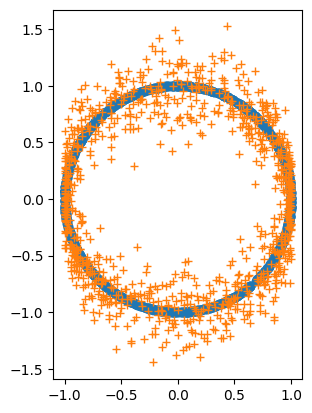

In [12]:
_, ax = plt.subplots()
ax.plot(x_on, y_on, 'o')
ax.plot(x_off, y_off, '+')
ax.set_aspect('equal')

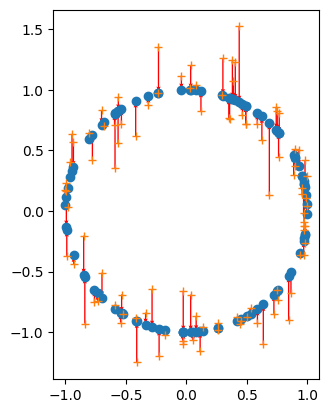

In [13]:
idx = np.random.choice(range(num_points), 100)
_, ax = plt.subplots()
ax.plot(x_on[idx], y_on[idx], 'o')
ax.plot(x_off[idx], y_off[idx], '+')
ax.quiver(x_off[idx], y_off[idx], x_on[idx]-x_off[idx], y_on[idx]-y_off[idx],
          scale=1, scale_units='xy', angles='xy', color='r', width=0.005)
ax.set_aspect('equal')

# Manifold

In [14]:
data = load_data('manifold')
x_on = np.array(data['target'])
x_off = np.array(data['start'])
num_points = len(x_on)

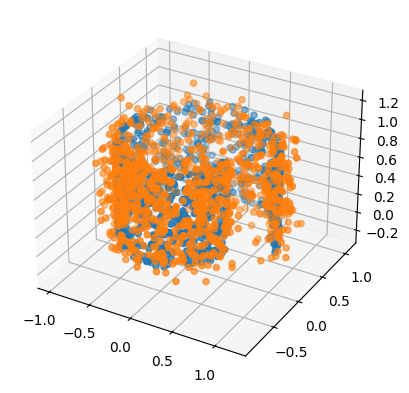

In [15]:
# a plot of the manifold
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_on[:, 0], x_on[:, 1], x_on[:, 2], 'o')
ax.scatter(x_off[:, 0], x_off[:, 1], x_off[:, 2], '+')

 # MNIST 1D



In [16]:
data = load_data('MNIST1D')
x_on = np.array(data['target'])
x_off = np.array(data['start'])
num_points = len(x_on)

The start classification label is [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
The target classification label is [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


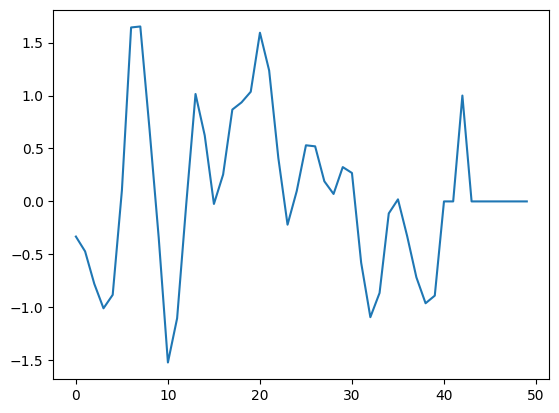

In [17]:
plot_index = 0
fig, ax = plt.subplots()
ax.plot(x_on[plot_index])
print(f'The start classification label is {x_off[plot_index,-10:]}')
print(f'The target classification label is {x_on[plot_index,-10:]}')


 # MNIST



In [18]:
data = load_data('MNIST')
x_on = np.array(data['target'])
x_off = np.array(data['start'])
num_points = len(x_on)

The start classification label is [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
The target classification label is [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


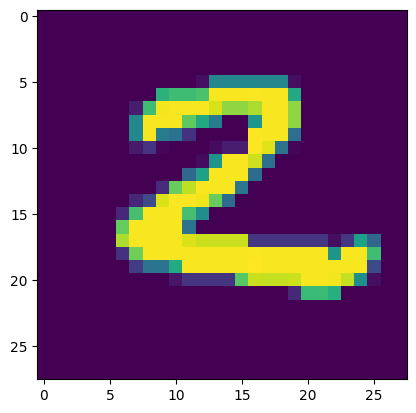

In [19]:
plot_index = 0
fig, ax = plt.subplots()
ax.imshow(x_on[plot_index, :-10].reshape(28, 28))
print(f'The start classification label is {x_off[plot_index,-10:]}')
print(f'The target classification label is {x_on[plot_index,-10:]}')


# Electric Field Range Localization


In [20]:
data = load_data('EMlocalization')
x_on = np.array(data['target'])
x_off = np.array(data['start'])
num_points = len(x_on)

In [21]:
print(x_on[0,-5:])
print(x_off[0,-5:])

[1.6616553e-01 1.5105535e-01 1.8094826e-01 6.6686824e-02 1.6740199e+04]
[1.6616553e-01 1.5105535e-01 1.8094826e-01 6.6686824e-02 1.1111000e+04]


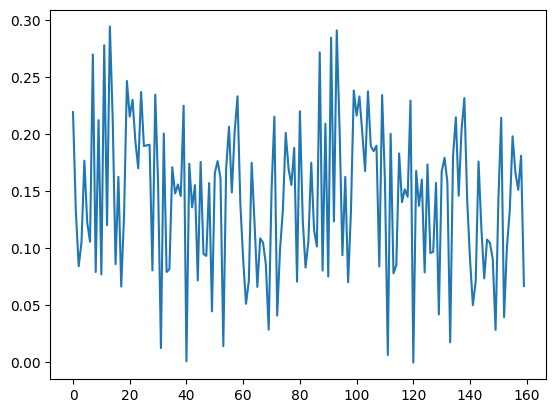

In [22]:
plt.plot(x_on[0, :-1])

# Lunar lander

In [23]:
data = load_data('LunarLander')
x_on = np.array(data['target'])
x_off = np.array(data['start'])
num_points = len(x_on)

x_on.shape

(4069, 408)

In [24]:
print(x_on[0,-6:])
print(x_off[0,-6:])

[-1.39392889 -1.38585329  1.          0.          0.          0.        ]
[-1.39392889 -1.38585329  0.          0.          0.          0.        ]


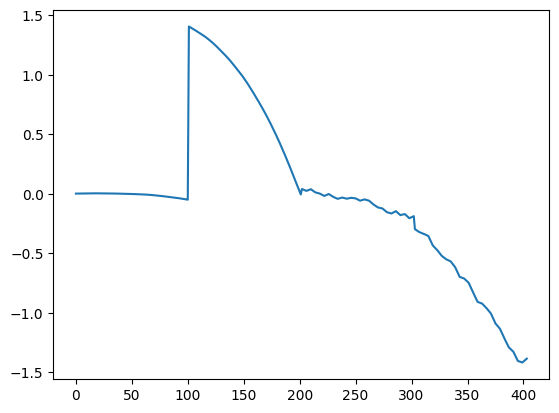

In [25]:
plt.plot(x_on[0, :-4])

# Mass spectrometry

In [26]:
data = load_data('MassSpec')
x_on = np.array(data['target'])
x_off = np.array(data['start'])
num_points = len(x_on)

x_on.shape

(572, 1433)

In [27]:
print(x_on[0,-522:-515])
print(x_off[0,-522:-515])

[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]


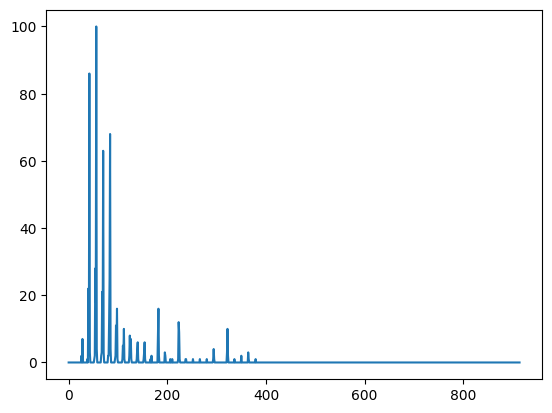

In [28]:
plt.plot(x_on[0, :915])

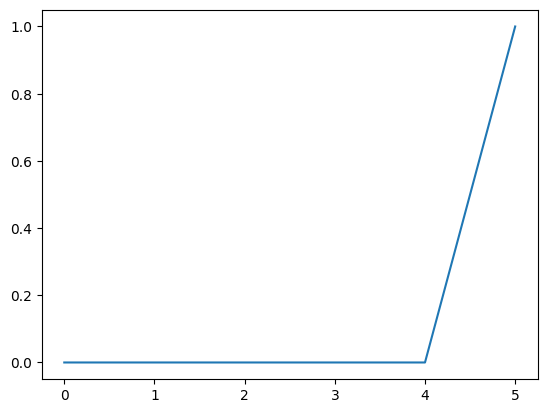

In [29]:
plt.plot(x_on[0, 915:-512])

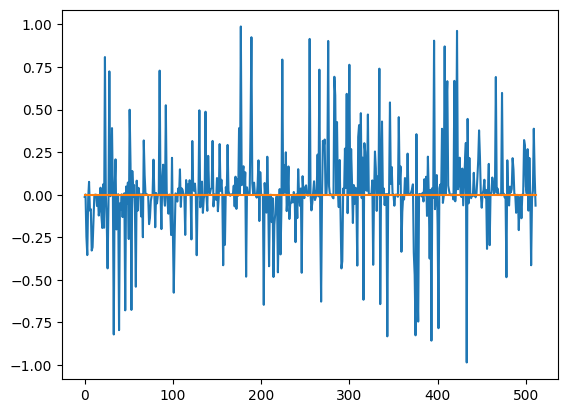

In [30]:
plt.plot(x_on[0, -512:])
plt.plot(x_off[0, -512:])
